In [7]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from math import pi
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-08-29 08:47:19,269: Credentials are already in use. The existing account in the session will be replaced.


In [8]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>,
 <PulseSimulator('pulse_simulator') from AerProvider()>]

In [9]:
backend = Aer.get_backend('qasm_simulator')
# TODO: ZNALEŹĆ KOMPUTER
# backend = Aer.get_backend('')
n=1
seria = 2048
theta = 0
phi = pi/2

In [10]:
qreg_q = QuantumRegister(n, 'q')
creg_c = ClassicalRegister(n, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.u3(theta, 0, 0, qreg_q[0])
circuit.u1(phi, qreg_q[0])
# pomiar typu Z
circuit.measure(qreg_q[0], creg_c[0])

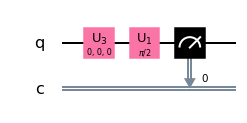

In [11]:
circuit.draw(output='mpl')

In [12]:
sim_result = execute(circuit, backend, shots=seria).result()
print(sim_result.get_counts(circuit))

{'0': 2048}


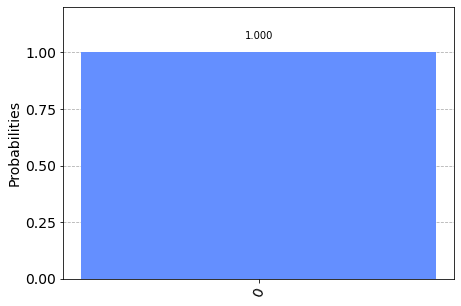

In [13]:
plot_histogram(sim_result.get_counts(circuit))

In [14]:
circuitX = QuantumCircuit(qreg_q, creg_c)

circuitX.u3(theta, 0, 0, qreg_q[0])
circuitX.u1(phi, qreg_q[0])
# pomiar typu X
circuitX.h(qreg_q[0])
circuitX.measure(qreg_q[0], creg_c[0])

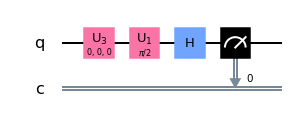

In [15]:
circuitX.draw(output='mpl')

In [16]:
simX_result = execute(circuitX, backend, shots=seria).result()
print(simX_result.get_counts(circuitX))

{'0': 1021, '1': 1027}


In [17]:
circuitY = QuantumCircuit(qreg_q, creg_c)

circuitY.u3(theta, 0, 0, qreg_q[0])
circuitY.u1(phi, qreg_q[0])
# pomiar typu Y
circuitY.sdg(qreg_q[0])
circuitY.h(qreg_q[0])
circuitY.measure(qreg_q[0], creg_c[0])

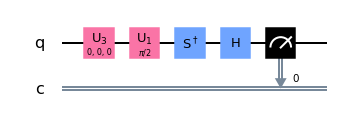

In [18]:
circuitY.draw(output='mpl')

In [19]:
simY_result = execute(circuitY, backend, shots=seria).result()
print(simY_result.get_counts(circuitY))

{'0': 989, '1': 1059}
